# MILITARY DATA SEGMENTATION FOR RESOURCE ALLOCATION



In this scenario, the overall aim of the clustering project could be to develop an optimal defense resource allocation strategy based on the military strength of different countries. The goal is to identify similar countries in terms of military capabilities and allocate resources efficiently.

In [60]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd 

In [61]:
military_data = 'World military power.csv'
mil_dataset = pd.read_csv(military_data,header = 1)

In [62]:
mil_dataset

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
1,Albania,2.3137,Albania,19,Albania,0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
3,Angola,0.8379,Angola,295,Angola,72,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#checking number of rows and columns of dataset
mil_dataset.shape

(165, 60)

In [64]:
#check length of our data
len(mil_dataset)

165

In [65]:
#checking first 5 data points
mil_dataset.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
1,Albania,2.3137,Albania,19,Albania,0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
3,Angola,0.8379,Angola,295,Angola,72,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


# EXPLORATORY DATA ANALYSIS


In [66]:
#checking all countries included in first column
mil_dataset['Military Strength'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Croatia', 'Cuba', 'Czechia', 'Democratic Republic of the Congo',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'Malaysia', 'Mali', 'Mauritania',
       'Mexico', 'Moldova'

In [67]:
#checking column names 
mil_dataset.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [68]:
mil_dataset.columns = mil_dataset.columns.str.replace(' ','_')

In [69]:
mil_dataset.head()

,Military_Strength,Military_Strength_Power_Index,Aircraft_Strength,Aircraft_Strength_value,Fighter/Interceptor_Strength,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength,Transport_Aircraft_Fleet_Strength_value,...,Total_Population,Total_Population_value,Total_Square_Land_Area,Total_Square_Land_Area_value,Total_Coastline_Coverage,Total_Coastline_Coverage_value,Total_Waterway_Coverage,Total_Waterway_Coverage_value,Total_Border_Coverage,Total_Border_Coverage_value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
1,Albania,2.3137,Albania,19,Albania,0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
3,Angola,0.8379,Angola,295,Angola,72,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


In [70]:
mil_dataset.rename(columns={'Military_Strength':'Country'}, inplace = True)

In [71]:
len(mil_dataset.columns)

60

In [72]:
mil_dataset.head()

,Country,Military_Strength_Power_Index,Aircraft_Strength,Aircraft_Strength_value,Fighter/Interceptor_Strength,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength,Transport_Aircraft_Fleet_Strength_value,...,Total_Population,Total_Population_value,Total_Square_Land_Area,Total_Square_Land_Area_value,Total_Coastline_Coverage,Total_Coastline_Coverage_value,Total_Waterway_Coverage,Total_Waterway_Coverage_value,Total_Border_Coverage,Total_Border_Coverage_value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
1,Albania,2.3137,Albania,19,Albania,0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
3,Angola,0.8379,Angola,295,Angola,72,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


from the data we can seee that for every 2 columns there is a duplicate of country names 
lest write a function to drop it 

In [73]:

#the country names are repititive we have to drop them
for value,column in enumerate(mil_dataset.columns):
    
        if value in range(2,60,2):
            mil_dataset.drop(column,axis = 1,inplace= True)

In [74]:
mil_dataset

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value
0,Afghanistan,1.3444,260,0,25.0,30.0,0,187,0.0,0,...,43,0,"5,500",0,"1,43,25,743","3,49,40,837","6,52,230",0,"1,200","5,987"
1,Albania,2.3137,19,0,0.0,0.0,0,19,0.0,0,...,4,"16,000","42,500","16,83,00,000","15,19,438","30,57,220","28,748",362,41,691
2,Algeria,0.4659,551,103,22.0,59.0,87,257,45.0,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,"6,734"
3,Angola,0.8379,295,72,18.0,30.0,47,126,15.0,379,...,176,"16,66,000","82,300","8,27,30,00,000","62,44,205","3,03,55,880","12,46,700","1,600","1,300","5,369"
4,Argentina,0.6521,227,24,7.0,9.0,64,100,0.0,370,...,"1,138","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400","4,989","11,000","11,968"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#checking for null values 
mil_dataset.isna().sum()

Country                                    27
Military_Strength_Power_Index              27
Aircraft_Strength_value                    27
Fighter/Interceptor_Strength_value         27
Attack_Aircraft_Strength_value             27
Transport_Aircraft_Fleet_Strength_value    27
Trainer_Aircraft_Fleet_value               27
Helicopter_Fleet_Strength_value            27
Attack_Helicopter_Fleet_Strength_value     27
Tank_Strength_value                        27
AFV/APC_Strength_value                     27
Self-Propelled_Artillery_Strength_value    27
Towed_Artillery_Strength_value             27
Rocket_Projector_Strength_value            27
Navy_Fleet_Strengths_value                 41
Aircraft_Carrier_Fleet_Strength_value      50
Submarine_Fleet_Strength_value             50
Destroyer_Fleet_Strength_value             50
Frigate_Fleet_Strength_value               50
defense_spending_budget_value              27
External_Debt_value                        27
Airport_Totals_value              

In [76]:
#check for missing values 
mil_dataset.isna()

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
161,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
162,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
163,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [77]:
#check for duplicated rows 
mil_dataset.duplicated().sum()

26

In [78]:
mil_dataset.isnull()

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
161,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
162,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
163,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [79]:
mil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military_Strength_Power_Index            138 non-null    float64
 2   Aircraft_Strength_value                  138 non-null    object 
 3   Fighter/Interceptor_Strength_value       138 non-null    object 
 4   Attack_Aircraft_Strength_value           138 non-null    float64
 5   Transport_Aircraft_Fleet_Strength_value  138 non-null    float64
 6   Trainer_Aircraft_Fleet_value             138 non-null    object 
 7   Helicopter_Fleet_Strength_value          138 non-null    object 
 8   Attack_Helicopter_Fleet_Strength_value   138 non-null    float64
 9   Tank_Strength_value                      138 non-null    object 
 10  AFV/APC_Strength_value                   138 non-n

In [80]:
mil_dataset.describe(include = 'object').T

,count,unique,top,freq
Country,138,138,Afghanistan,1
Aircraft_Strength_value,138,113,19,5
Fighter/Interceptor_Strength_value,138,63,0,46
Trainer_Aircraft_Fleet_value,138,77,0,25
Helicopter_Fleet_Strength_value,138,97,5,4
Tank_Strength_value,138,106,0,24
AFV/APC_Strength_value,138,130,"2,000",4
Self-Propelled_Artillery_Strength_value,138,70,0,52
Towed_Artillery_Strength_value,138,91,0,24
Rocket_Projector_Strength_value,138,68,0,46


In [82]:
#lets remove
column_list_01 = mil_dataset.columns[1:len(mil_dataset.columns)]

In [83]:
column_list_01

Index(['Military_Strength_Power_Index', 'Aircraft_Strength_value',
       'Fighter/Interceptor_Strength_value', 'Attack_Aircraft_Strength_value',
       'Transport_Aircraft_Fleet_Strength_value',
       'Trainer_Aircraft_Fleet_value', 'Helicopter_Fleet_Strength_value',
       'Attack_Helicopter_Fleet_Strength_value', 'Tank_Strength_value',
       'AFV/APC_Strength_value', 'Self-Propelled_Artillery_Strength_value',
       'Towed_Artillery_Strength_value', 'Rocket_Projector_Strength_value',
       'Navy_Fleet_Strengths_value', 'Aircraft_Carrier_Fleet_Strength_value',
       'Submarine_Fleet_Strength_value', 'Destroyer_Fleet_Strength_value',
       'Frigate_Fleet_Strength_value', 'defense_spending_budget_value',
       'External_Debt_value', 'Airport_Totals_value', 'Oil_Production_value',
       'Oil_Consumption_value', 'Proven_Oil_Reserves_value',
       'Available_Manpower_value', 'Total_Population_value',
       'Total_Square_Land_Area_value', 'Total_Coastline_Coverage_value',
       '

In [84]:
mil_dataset['Military_Strength_Power_Index'].dtype

dtype('float64')

In [85]:
for index, row in mil_dataset.iterrows():
    # Iterate through values in the row
    for col in mil_dataset.columns:
        value = row[col]
        # Check if the value contains a comma
        if ',' in str(value):
            # Remove the comma from the value and update the DataFrame
            mil_dataset.at[index, col] = value.replace(',', '')


In [86]:
columnlist_02 = mil_dataset.columns
for column in columnlist_02[1:]:
    
    
    if mil_dataset[column].dtype == 'object':
        pd.to_numeric(mil_dataset[column])

In [87]:
#convert all columsn except first to numeric values
for column in mil_dataset.columns[1:]:
    mil_dataset[column] = pd.to_numeric(mil_dataset[column])

In [88]:
mil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military_Strength_Power_Index            138 non-null    float64
 2   Aircraft_Strength_value                  138 non-null    float64
 3   Fighter/Interceptor_Strength_value       138 non-null    float64
 4   Attack_Aircraft_Strength_value           138 non-null    float64
 5   Transport_Aircraft_Fleet_Strength_value  138 non-null    float64
 6   Trainer_Aircraft_Fleet_value             138 non-null    float64
 7   Helicopter_Fleet_Strength_value          138 non-null    float64
 8   Attack_Helicopter_Fleet_Strength_value   138 non-null    float64
 9   Tank_Strength_value                      138 non-null    float64
 10  AFV/APC_Strength_value                   138 non-n

checking for repeated colummns

In [89]:
mil_dataset.columns.nunique()

31

In [90]:
len(mil_dataset.columns)

31

In [91]:
mil_dataset.drop_duplicates(inplace=True)

In [92]:
len(mil_dataset)

139

In [93]:
mil_dataset.isna().sum()

Country                                     1
Military_Strength_Power_Index               1
Aircraft_Strength_value                     1
Fighter/Interceptor_Strength_value          1
Attack_Aircraft_Strength_value              1
Transport_Aircraft_Fleet_Strength_value     1
Trainer_Aircraft_Fleet_value                1
Helicopter_Fleet_Strength_value             1
Attack_Helicopter_Fleet_Strength_value      1
Tank_Strength_value                         1
AFV/APC_Strength_value                      1
Self-Propelled_Artillery_Strength_value     1
Towed_Artillery_Strength_value              1
Rocket_Projector_Strength_value             1
Navy_Fleet_Strengths_value                 15
Aircraft_Carrier_Fleet_Strength_value      24
Submarine_Fleet_Strength_value             24
Destroyer_Fleet_Strength_value             24
Frigate_Fleet_Strength_value               24
defense_spending_budget_value               1
External_Debt_value                         1
Airport_Totals_value              

In [94]:
mil_dataset.fillna(0,inplace = True)

In [95]:
mil_dataset.isna().sum()

Country                                    0
Military_Strength_Power_Index              0
Aircraft_Strength_value                    0
Fighter/Interceptor_Strength_value         0
Attack_Aircraft_Strength_value             0
Transport_Aircraft_Fleet_Strength_value    0
Trainer_Aircraft_Fleet_value               0
Helicopter_Fleet_Strength_value            0
Attack_Helicopter_Fleet_Strength_value     0
Tank_Strength_value                        0
AFV/APC_Strength_value                     0
Self-Propelled_Artillery_Strength_value    0
Towed_Artillery_Strength_value             0
Rocket_Projector_Strength_value            0
Navy_Fleet_Strengths_value                 0
Aircraft_Carrier_Fleet_Strength_value      0
Submarine_Fleet_Strength_value             0
Destroyer_Fleet_Strength_value             0
Frigate_Fleet_Strength_value               0
defense_spending_budget_value              0
External_Debt_value                        0
Airport_Totals_value                       0
Oil_Produc

In [96]:
mil_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Military_Strength_Power_Index,139.0,1.450207e+00,1.325017e+00,0.0,5.611000e-01,1.018300e+00,2.019450e+00,1.016810e+01
Aircraft_Strength_value,139.0,3.856763e+02,1.227952e+03,0.0,3.150000e+01,1.090000e+02,2.875000e+02,1.326400e+04
Fighter/Interceptor_Strength_value,139.0,8.097842e+01,2.295930e+02,0.0,0.000000e+00,1.700000e+01,6.000000e+01,2.085000e+03
Attack_Aircraft_Strength_value,139.0,2.557554e+01,9.421045e+01,0.0,0.000000e+00,0.000000e+00,1.550000e+01,7.420000e+02
Transport_Aircraft_Fleet_Strength_value,139.0,3.001439e+01,9.203103e+01,0.0,3.000000e+00,9.000000e+00,2.500000e+01,9.450000e+02
Trainer_Aircraft_Fleet_value,139.0,8.223741e+01,2.400325e+02,0.0,4.000000e+00,2.600000e+01,7.850000e+01,2.643000e+03
Helicopter_Fleet_Strength_value,139.0,1.529568e+02,5.184602e+02,0.0,1.500000e+01,4.400000e+01,1.265000e+02,5.768000e+03
Attack_Helicopter_Fleet_Strength_value,139.0,2.543885e+01,9.699717e+01,0.0,0.000000e+00,2.000000e+00,1.750000e+01,9.670000e+02
Tank_Strength_value,139.0,6.419137e+02,1.510958e+03,0.0,1.850000e+01,1.500000e+02,4.355000e+02,1.295000e+04
AFV/APC_Strength_value,139.0,2.467813e+03,5.395029e+03,0.0,2.490000e+02,7.300000e+02,2.000000e+03,3.925300e+04


In [97]:
mil_dataset.corr()

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_30818/2463756250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mil_dataset.corr()


,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,...,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value
Military_Strength_Power_Index,1.000000,-0.263553,-0.306568,-0.238655,-0.263225,-0.280650,-0.241040,-0.228554,-0.319273,-0.356281,...,-0.170664,-0.259892,-0.278494,-0.180359,-0.233226,-0.238961,-0.254062,-0.180947,-0.236439,-0.237383
Aircraft_Strength_value,-0.263553,1.000000,0.944532,0.860344,0.974048,0.974305,0.992805,0.964278,0.625935,0.844997,...,0.884305,0.626211,0.903502,0.125605,0.386265,0.403848,0.586833,0.153117,0.445449,0.415462
Fighter/Interceptor_Strength_value,-0.306568,0.944532,1.000000,0.878908,0.908842,0.886399,0.905918,0.922081,0.720168,0.932733,...,0.733602,0.623123,0.923445,0.142121,0.566396,0.571268,0.619617,0.145400,0.551667,0.486819
Attack_Aircraft_Strength_value,-0.238655,0.860344,0.878908,1.000000,0.892726,0.762278,0.820993,0.916192,0.812406,0.871827,...,0.663245,0.731983,0.774020,0.163305,0.459486,0.465986,0.773766,0.162595,0.657145,0.608576
Transport_Aircraft_Fleet_Strength_value,-0.263225,0.974048,0.908842,0.892726,1.000000,0.928048,0.964266,0.948878,0.647938,0.818208,...,0.874765,0.668915,0.878311,0.154568,0.430018,0.450305,0.671894,0.172210,0.507428,0.513417
Trainer_Aircraft_Fleet_value,-0.280650,0.974305,0.886399,0.762278,0.928048,1.000000,0.973756,0.909808,0.547580,0.774185,...,0.899286,0.570084,0.855693,0.124467,0.298329,0.321913,0.500964,0.159349,0.338905,0.317456
Helicopter_Fleet_Strength_value,-0.241040,0.992805,0.905918,0.820993,0.964266,0.973756,1.000000,0.953035,0.568728,0.798559,...,0.904497,0.595925,0.877814,0.106639,0.313688,0.333906,0.537874,0.142627,0.385948,0.362704
Attack_Helicopter_Fleet_Strength_value,-0.228554,0.964278,0.922081,0.916192,0.948878,0.909808,0.953035,1.000000,0.693398,0.860361,...,0.812906,0.665779,0.846213,0.124635,0.320016,0.330087,0.648444,0.143697,0.515744,0.440613
Tank_Strength_value,-0.319273,0.625935,0.720168,0.812406,0.647938,0.547580,0.568728,0.693398,1.000000,0.779070,...,0.347422,0.567769,0.481747,0.146991,0.363764,0.371807,0.617666,0.120694,0.531668,0.482196
AFV/APC_Strength_value,-0.356281,0.844997,0.932733,0.871827,0.818208,0.774185,0.798559,0.860361,0.779070,1.000000,...,0.592104,0.683622,0.844935,0.222000,0.554322,0.549831,0.645008,0.141817,0.580433,0.502741


lets analyze 

-the most importance feature is the Military_Strength_Power_Index

-lets check for columns that have the least correlation with it 


In [98]:
columns_to_drop = ['Airport_Totals_value','Proven_Oil_Reserves_value','Total_Coastline_Coverage_value']

mil_dataset.drop(columns_to_drop,axis = 1,inplace=True )

# EDA 2 - lets visualize

we want to answer the questions 
- top countries with most powerful military
-


In [99]:
import seaborn as sns


Text(0.5, 1.0, 'Top 10 Countries Based on Military_Strength_Power_Index')

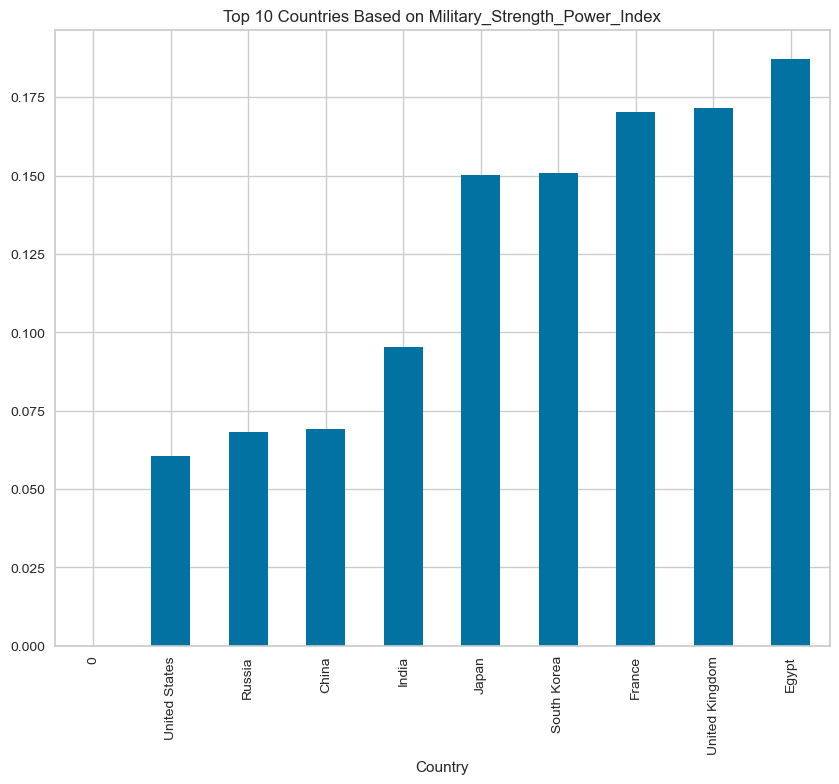

In [178]:
plt.figure(figsize = (10,8))
mil_dataset.groupby('Country')['Military_Strength_Power_Index'].mean().sort_values(ascending=True).head(10).plot(kind = 'bar',)
plt.title('Top 10 Countries Based on Military_Strength_Power_Index')


Text(0.5, 1.0, '10 Countries With Worst  Military_Strength_Power_Index')

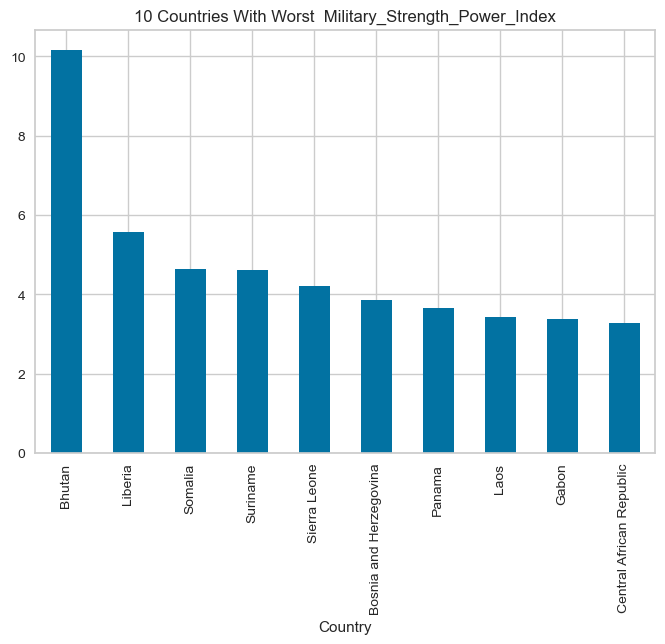

In [179]:
mil_dataset.groupby('Country')['Military_Strength_Power_Index'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('10 Countries With Worst  Military_Strength_Power_Index')

Text(0.5, 1.0, 'Top 10 Countries With Worst Aircraft_Strength_value')

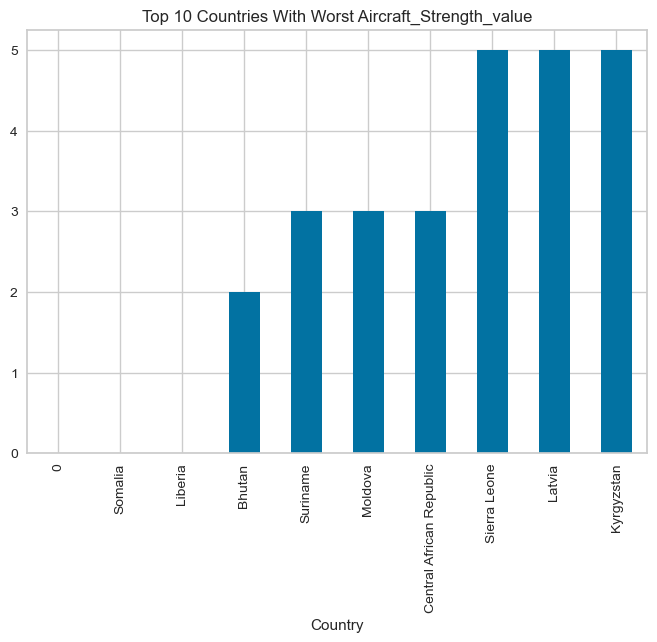

In [180]:
mil_dataset.groupby('Country')['Aircraft_Strength_value'].mean().sort_values(ascending=True).head(10).plot(kind = 'bar')
plt.title('Top 10 Countries With Worst Aircraft_Strength_value')

Text(0.5, 1.0, 'Top 10 Countries With Least Available Manpower Value')

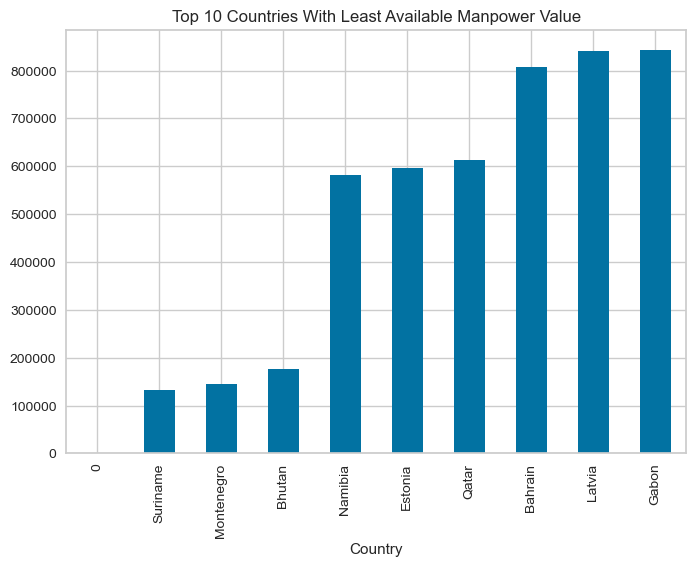

In [182]:
mil_dataset.groupby('Country')['Available_Manpower_value'].mean().sort_values(ascending=True).head(10).plot(kind = 'bar')
plt.title('Top 10 Countries With Least Available Manpower Value')

Text(0.5, 1.0, 'Top 10 Countries With HIghest Available Manpower Value')

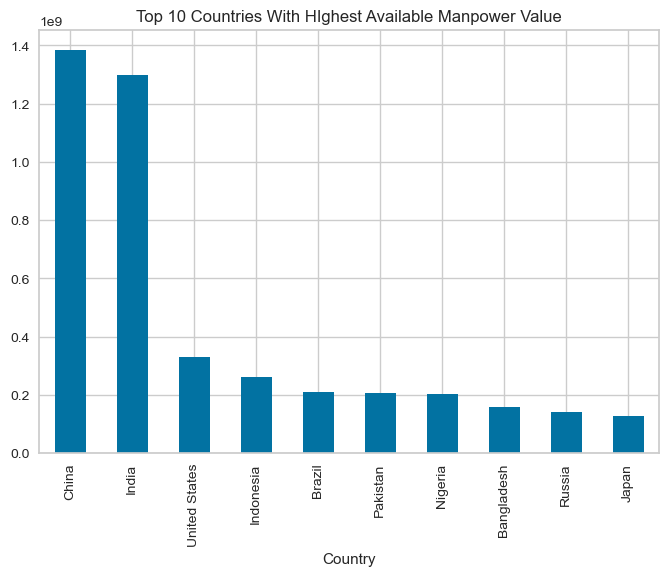

In [183]:
mil_dataset.groupby('Country')['Total_Population_value'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('Top 10 Countries With HIghest Available Manpower Value')

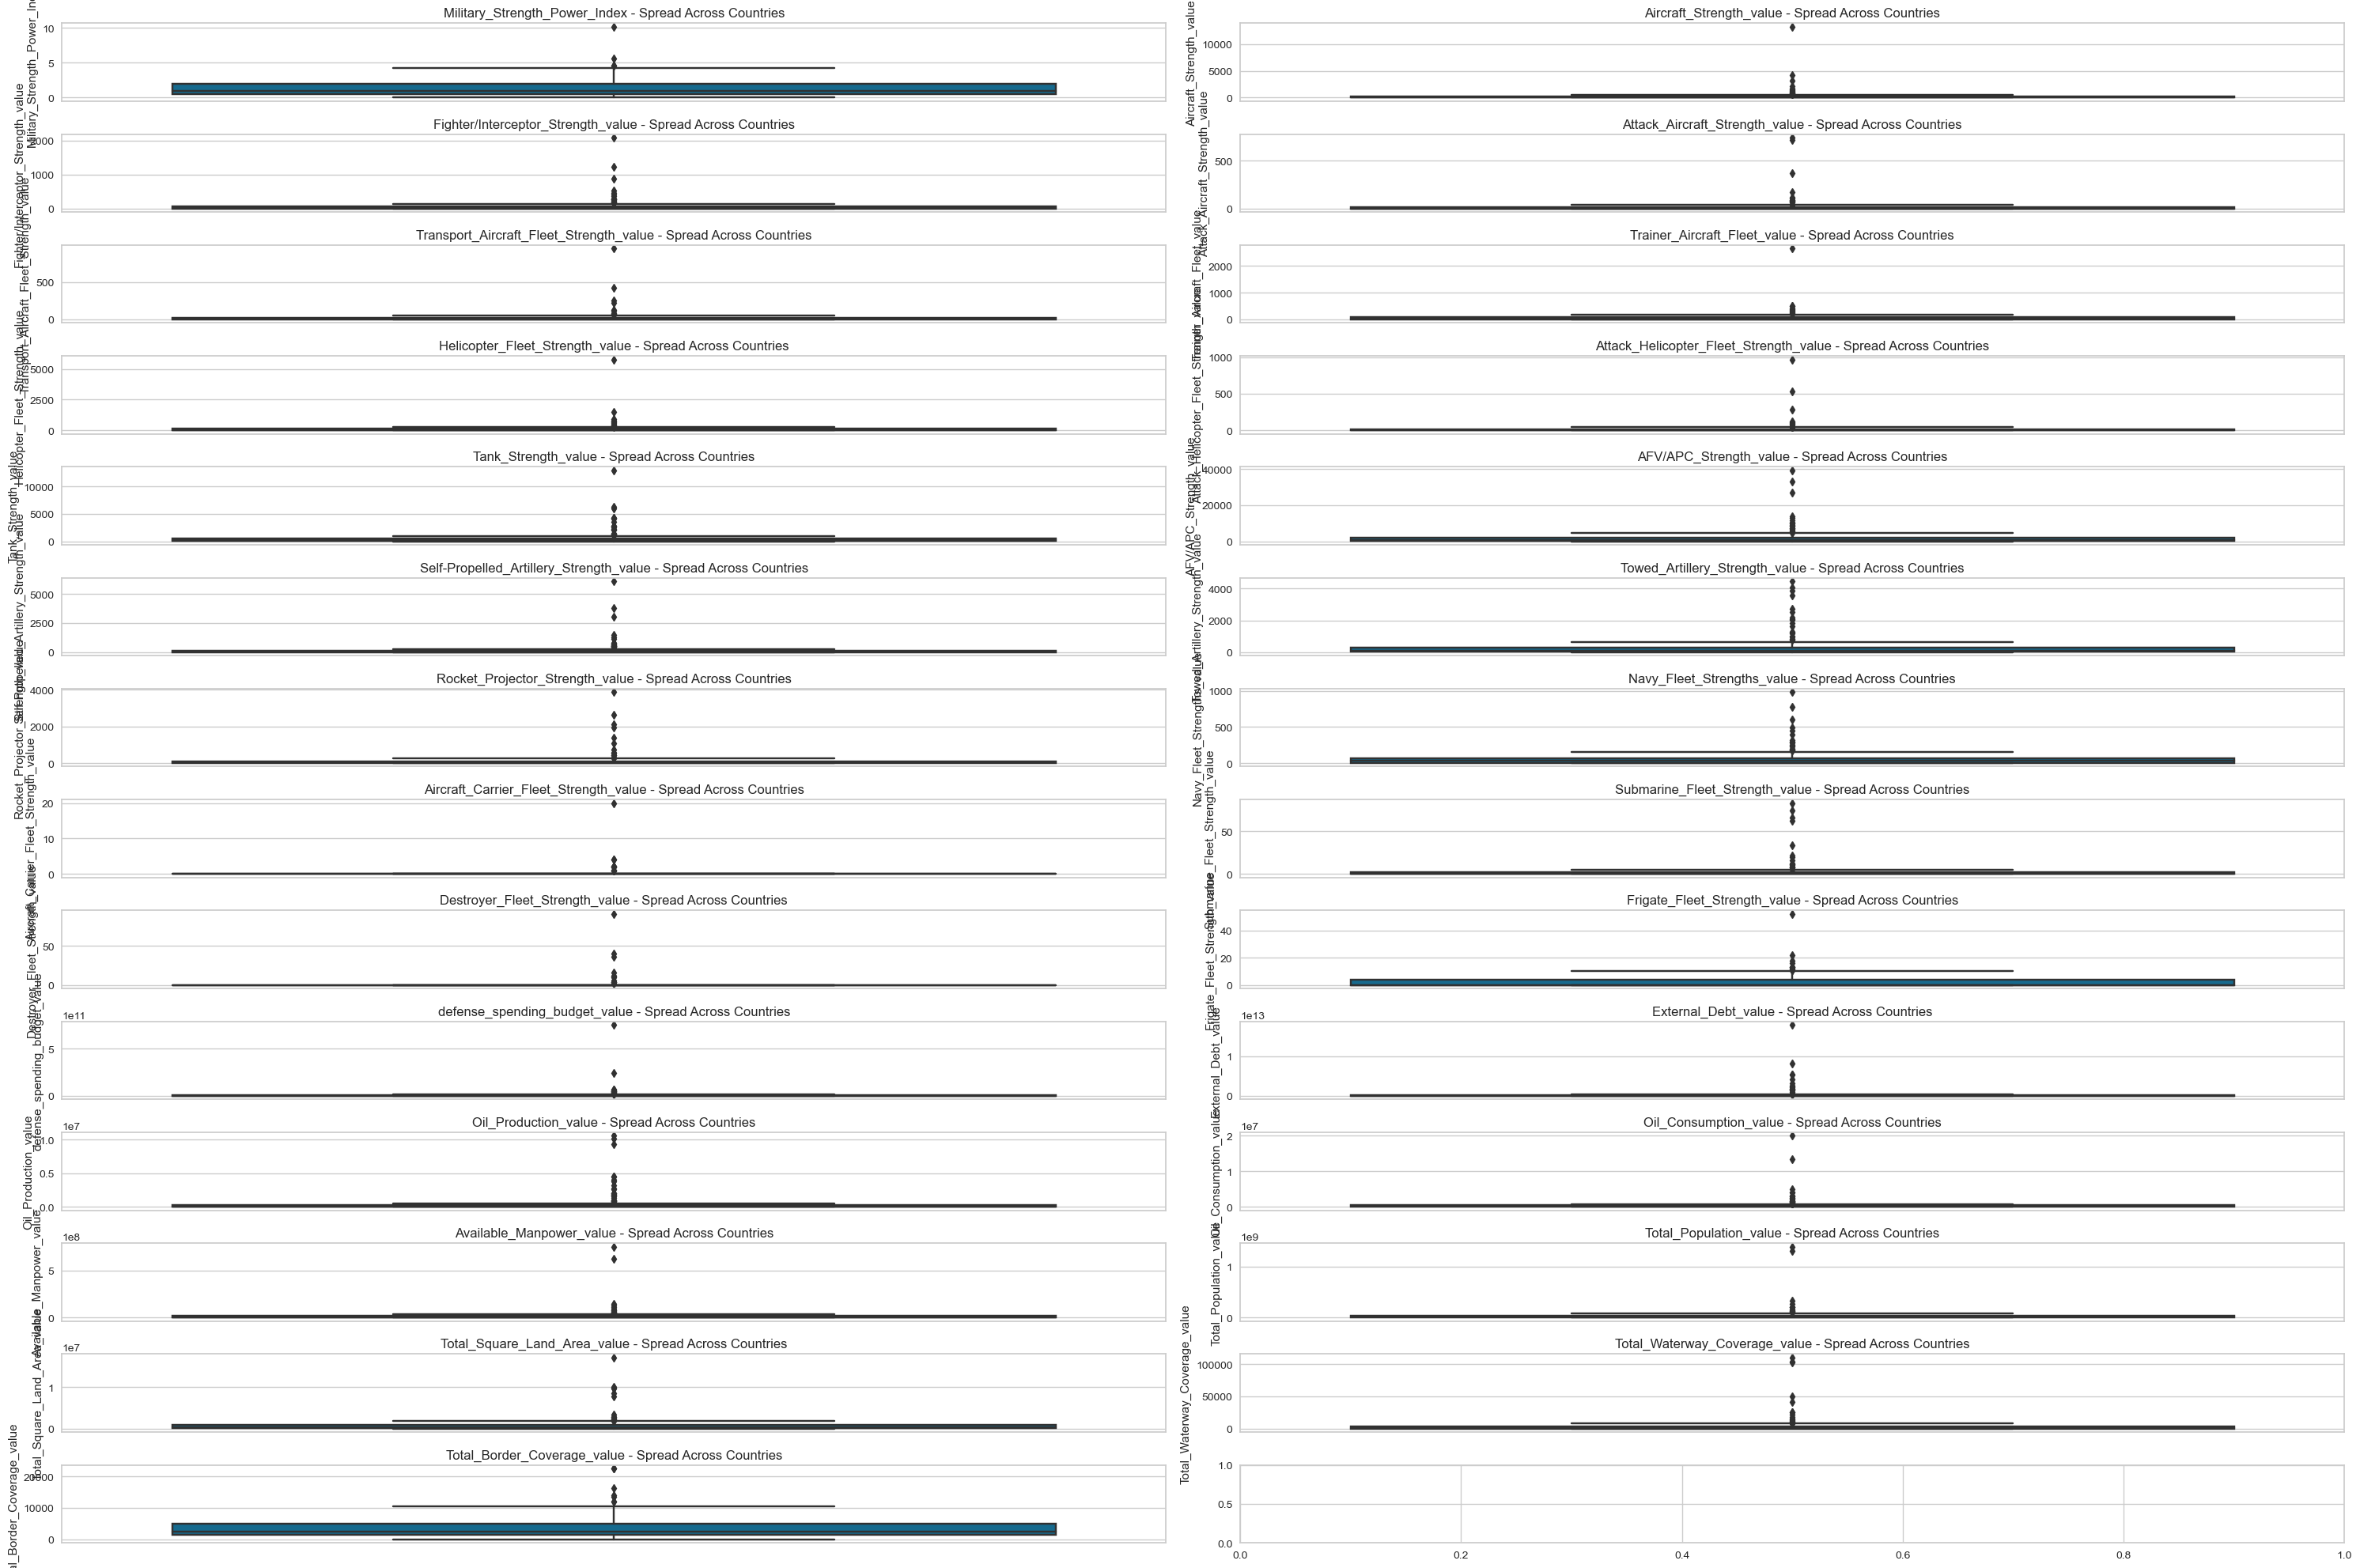

In [210]:
import numpy as np 
# List of features you want to visualize
not_needed_features = ['classes', 'Overall_Military_Power', 'Country']
to_be_plotted = [column for column in mil_dataset.columns if column not in not_needed_features]

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = int(np.ceil(len(to_be_plotted) / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot boxplots for each feature
for i, column in enumerate(to_be_plotted):
    sns.boxplot(data=mil_dataset, y=column, ax=axes[i])
    axes[i].set_title(f'{column} - Spread Across Countries')

# Adjust layout
plt.tight_layout()

# Show or save the plots
plt.show()


In [193]:
mil_dataset.columns

Index(['Country', 'Military_Strength_Power_Index', 'Aircraft_Strength_value',
       'Fighter/Interceptor_Strength_value', 'Attack_Aircraft_Strength_value',
       'Transport_Aircraft_Fleet_Strength_value',
       'Trainer_Aircraft_Fleet_value', 'Helicopter_Fleet_Strength_value',
       'Attack_Helicopter_Fleet_Strength_value', 'Tank_Strength_value',
       'AFV/APC_Strength_value', 'Self-Propelled_Artillery_Strength_value',
       'Towed_Artillery_Strength_value', 'Rocket_Projector_Strength_value',
       'Navy_Fleet_Strengths_value', 'Aircraft_Carrier_Fleet_Strength_value',
       'Submarine_Fleet_Strength_value', 'Destroyer_Fleet_Strength_value',
       'Frigate_Fleet_Strength_value', 'defense_spending_budget_value',
       'External_Debt_value', 'Oil_Production_value', 'Oil_Consumption_value',
       'Available_Manpower_value', 'Total_Population_value',
       'Total_Square_Land_Area_value', 'Total_Waterway_Coverage_value',
       'Total_Border_Coverage_value', 'classes', 'Overall_

/var/folders/9m/fk8nf0sd56b7drjkrkbjx7580000gn/T/ipykernel_30818/684383888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mil_dataset.corr(), cmap='flare',  linewidths=.5)


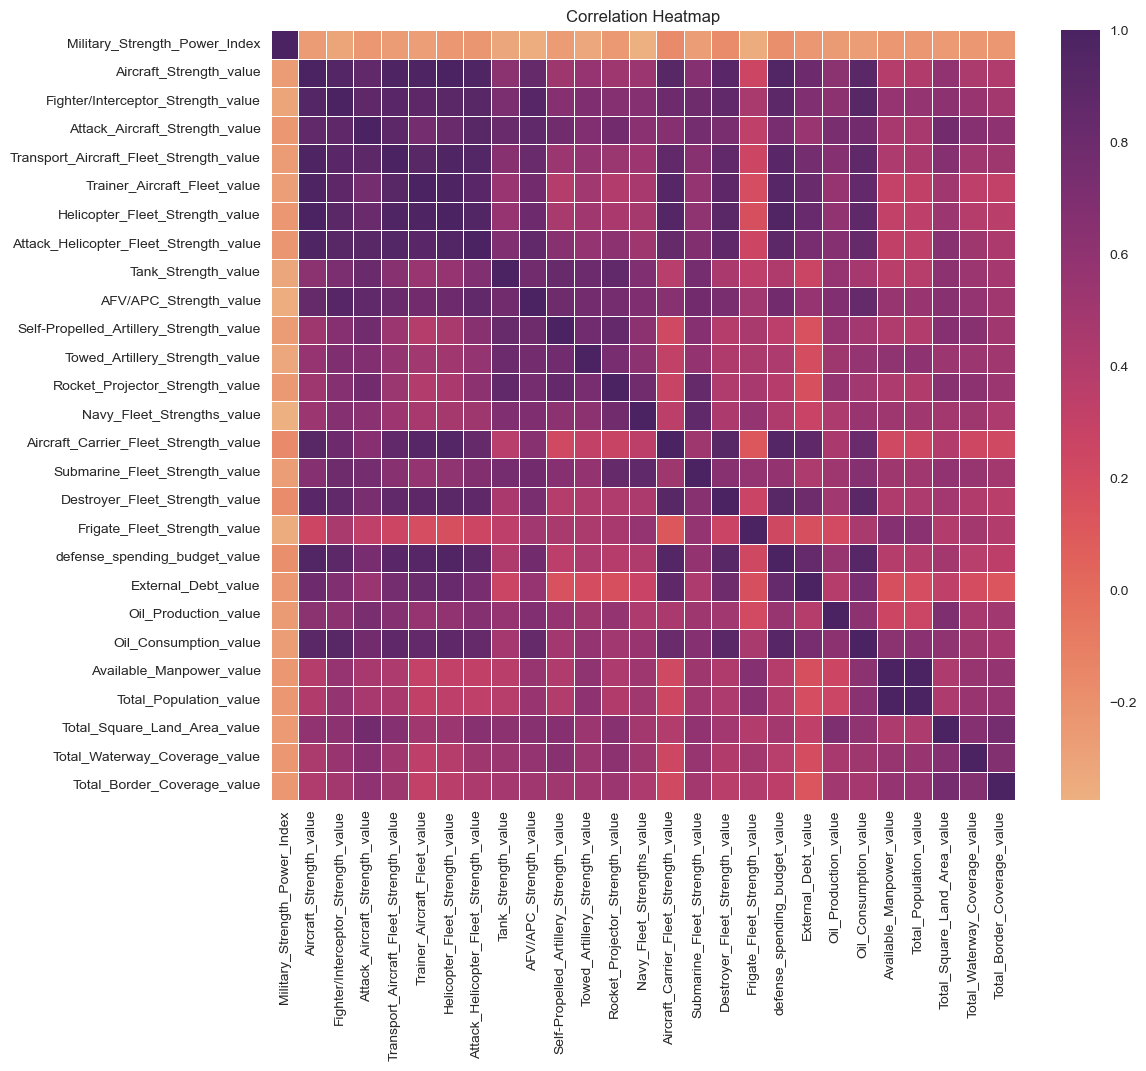

In [101]:
plt.figure(figsize=(12, 10))
sns.heatmap(mil_dataset.corr(), cmap='flare',  linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


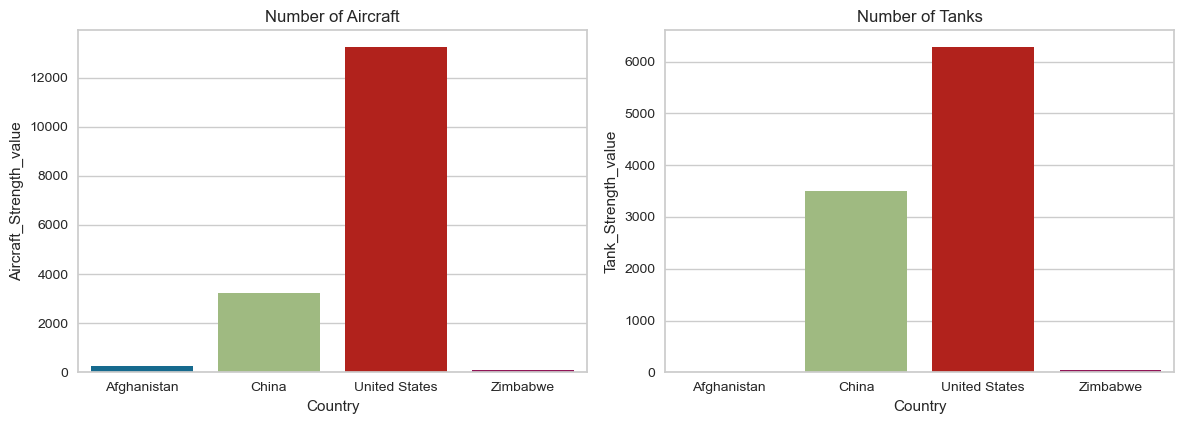

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sampled countries
sampled_countries = ['China', 'Zimbabwe', 'United States', 'Afghanistan']

# Filter the dataset for the sampled countries
filtered_dataset = mil_dataset[mil_dataset['Country'].isin(sampled_countries)]

# Plot bar plots for each category
plt.figure(figsize=(12, 8))

# Bar plot for the number of aircraft
plt.subplot(2, 2, 1)
sns.barplot(x='Country', y='Aircraft_Strength_value', data=filtered_dataset)
plt.title('Number of Aircraft')

# Bar plot for the number of tanks
plt.subplot(2, 2, 2)
sns.barplot(x='Country', y='Tank_Strength_value', data=filtered_dataset)
plt.title('Number of Tanks')



plt.tight_layout()
plt.show()


In [103]:
filtered_dataset

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,Frigate_Fleet_Strength_value,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,1.200000e+10,2.840000e+09,0.0,5500.0,14325743.0,3.494084e+07,652230.0,1200.0,5987.0
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,52.0,2.370000e+11,1.598000e+12,3838000.0,13500000.0,752855402.0,1.384689e+09,9596961.0,110000.0,22457.0
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,0.0,7.500000e+11,1.791000e+13,9352000.0,20000000.0,144872845.0,3.292565e+08,9826675.0,41009.0,12048.0
137,Zimbabwe,1.7577,90.0,10.0,0.0,14.0,38.0,28.0,6.0,42.0,...,0.0,1.000000e+08,9.357000e+09,0.0,19500.0,5584086.0,1.403037e+07,390757.0,0.0,3229.0


# Insights form EDA

-The higher the military power index the lower the overall strentch of military 

-USA has the lowest and Bhutan has the highest 

-Kryzstan,Latvia and Liberia have the lowest Aircraft Strength value

-Suriname and Montenegro have the lowest Available Manpower value

-China,India and Usa have the highest populations amongst these coutries 
and we might want to find out more on the correlation between the population value and military strength


In [107]:
# from sklearn import metrics 
from sklearn.preprocessing import StandardScaler,RobustScaler,scale
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [108]:
mil_dataset_Scaled = mil_dataset.drop('Country',axis = 1 )

In [109]:
scaler = StandardScaler()

In [110]:
mil_dataset_Scaled = scaler.fit_transform(mil_dataset_Scaled)

In [111]:
mil_dataset_Scaled

array([[-0.08014224, -0.10271637, -0.3539798 , ..., -0.13368609,
        -0.25789484,  0.61532267],
       [ 0.65404104, -0.29968789, -0.3539798 , ..., -0.41568038,
        -0.32864345, -0.79663118],
       [-0.74555028,  0.13512062,  0.09626263, ...,  0.64855339,
        -0.3311462 ,  0.81447855],
       ...,
       [ 0.14860361, -0.22694737, -0.27529666, ..., -0.08828166,
        -0.1937999 ,  0.63025269],
       [ 0.2329063 , -0.24165893, -0.31026695, ..., -0.25194755,
        -0.3311462 , -0.11998109],
       [-1.09843998, -0.31521676, -0.3539798 , ..., -0.4286828 ,
        -0.3311462 , -0.98085703]])

In [112]:
mil_dataset_Scaled[1]

array([ 0.65404104, -0.29968789, -0.3539798 , -0.27245426, -0.32731287,
       -0.34384857, -0.25930884, -0.26321234, -0.42637522, -0.37220363,
       -0.30826017, -0.48852905, -0.32387573, -0.27018111, -0.17670255,
       -0.31655477, -0.18678124, -0.484116  , -0.20412484, -0.27597309,
       -0.34142146, -0.30384307, -0.2828796 , -0.30333723, -0.41568038,
       -0.32864345, -0.79663118])

In [113]:
pd.DataFrame(mil_dataset_Scaled)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.080142,-0.102716,-0.353980,-0.006131,-0.000157,-0.343849,0.065900,-0.263212,-0.426375,-0.261518,...,-0.484116,-0.028322,-0.279606,-0.351084,-0.321021,-0.130286,-0.108899,-0.133686,-0.257895,0.615323
1,0.654041,-0.299688,-0.353980,-0.272454,-0.327313,-0.343849,-0.259309,-0.263212,-0.426375,-0.372204,...,-0.484116,-0.204125,-0.275973,-0.341421,-0.303843,-0.282880,-0.303337,-0.415680,-0.328643,-0.796631
2,-0.745550,0.135121,0.096263,-0.038090,0.316094,0.019913,0.201403,0.202397,0.158143,0.910261,...,0.346651,-0.013360,-0.277742,0.437639,-0.172690,-0.053842,-0.067939,0.648553,-0.331146,0.814479
3,-0.463784,-0.074111,-0.039247,-0.080702,-0.000157,-0.147334,-0.052182,-0.108009,-0.174634,-0.348392,...,-0.484116,-0.103132,-0.258216,0.655051,-0.285366,-0.226582,-0.136860,0.135186,-0.251791,0.450559
4,-0.604516,-0.129688,-0.249069,-0.197884,-0.229166,-0.076254,-0.102512,-0.263212,-0.180612,-0.321605,...,-0.484116,-0.145025,-0.164007,-0.061564,-0.005556,-0.060537,-0.049420,0.828863,0.340325,2.209903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-0.828868,-0.075745,-0.017391,-0.272454,0.087085,-0.193326,-0.028953,-0.004541,1.310574,0.011568,...,1.011265,-0.125575,-0.228506,-0.187180,-0.079838,0.307221,0.269806,-0.278880,0.749433,0.249804
135,-0.158310,-0.177092,-0.017391,-0.272454,-0.240071,-0.256044,-0.178007,-0.118356,-0.014556,-0.344672,...,-0.484116,-0.186919,-0.277302,-0.343680,-0.256256,-0.166742,-0.147158,-0.189888,-0.331146,-0.554018
136,0.148604,-0.226947,-0.275297,-0.272454,-0.207356,-0.126428,-0.243823,-0.263212,-0.376558,-0.424849,...,-0.484116,-0.207267,-0.274798,-0.351084,-0.313825,-0.227503,-0.221693,-0.088282,-0.193800,0.630253
137,0.232906,-0.241659,-0.310267,-0.272454,-0.174640,-0.184964,-0.241887,-0.201131,-0.398478,-0.403270,...,-0.484116,-0.206369,-0.276054,-0.351084,-0.314521,-0.234447,-0.236419,-0.251948,-0.331146,-0.119981


Elbow method for k value

In [114]:
wss = []
for k in range(2,11):
    model_ = KMeans(n_clusters= k ,random_state=101,n_init=25)
    model_.fit(mil_dataset_Scaled)
    wss.append(model_.inertia_)


In [115]:
wss

[1913.4295040010784,
 1376.8404924591298,
 1095.3684327991186,
 913.5205742095468,
 785.8459396919241,
 677.528545211031,
 601.9683609533015,
 536.0756255015677,
 478.5132109678755]

<Axes: >

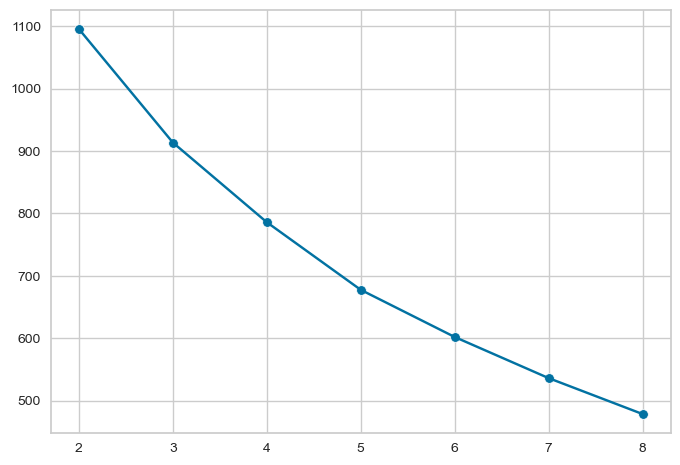

In [116]:
ser = pd.Series(wss)
new_index = [k for k in range(2,11)]
ser = ser.reindex(new_index)
sns.scatterplot(x = ser.index, y = ser.values)
sns.lineplot(ser)

the elbow bending at 4 indicates 4 is a good k value 

In [117]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_init=25, random_state=123),
                 k=(2, 9))

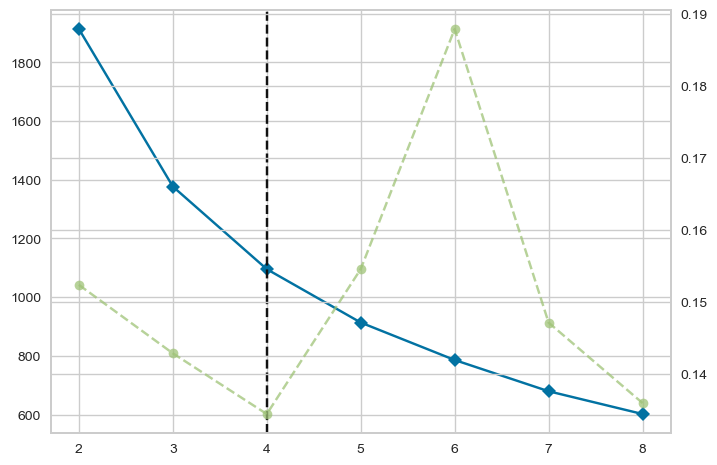

In [147]:
#KElbowVisualizer(estimator=model_s,k=(2,11))
visualizer = KElbowVisualizer(model_s, k=(2,9))
visualizer.fit(mil_dataset_Scaled) # Fit the data to the visualizer visualizer.show();

In [119]:
new_index

[2, 3, 4, 5, 6, 7, 8, 9, 10]

from this elbow grapth optimim k value = 2
but lets  verify from another test 

In [120]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score


In [121]:
silhouette_scores = []

for k in range (2,11):
    # Create KMeans model
    model_s = KMeans(n_clusters=k, random_state=123, n_init=25)
    
    # Fit the model to the data
    model_s.fit(mil_dataset_Scaled)
    
    # Predict cluster labels
    labels = model_s.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(mil_dataset_Scaled,labels )
    silhouette_scores.append(silhouette_avg)

In [122]:
silhouette_scores

[0.8633786519239254,
 0.844325957605006,
 0.45843549208763673,
 0.44517465091098085,
 0.44569747832805234,
 0.34351624103500616,
 0.39666448984968167,
 0.29415915426126993,
 0.2214011152987842]

<Axes: >

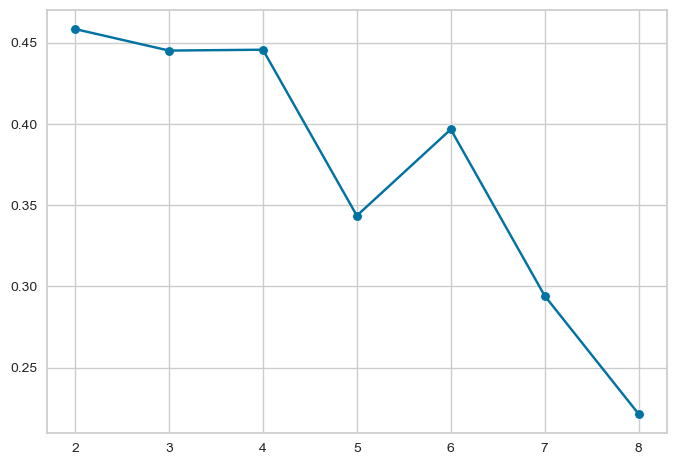

In [123]:
sil_series = pd.Series(silhouette_scores)
sil_series = sil_series.reindex(new_index)
sns.scatterplot(x = sil_series.index,y = sil_series.values)
sns.lineplot(sil_series)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_init=25, random_state=123),
                 k=(2, 9), locate_elbow=False, metric='calinski_harabasz',
                 timings=False)

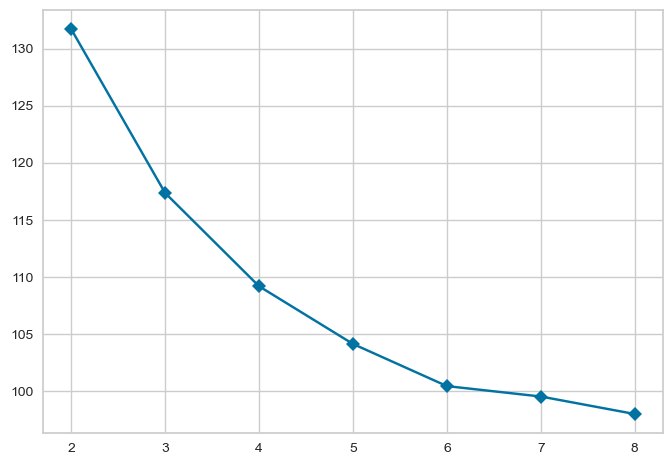

In [124]:
KElbowVisualizer(estimator=model_s,k=(2,11))
visualizer = KElbowVisualizer(model_s, k=(2,9),metric='calinski_harabasz', timings=False, locate_elbow=False)
visualizer.fit(mil_dataset_Scaled) # Fit the data to the visualizer visualizer.show();

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=4, random_state=101))

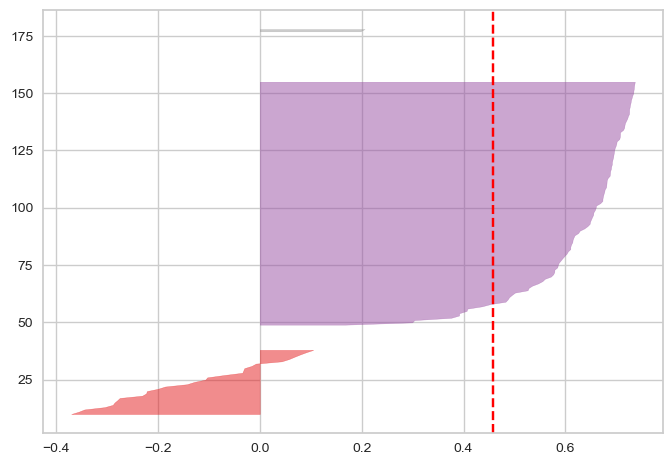

In [125]:
from yellowbrick.cluster import SilhouetteVisualizer
final_model = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(final_model)
visualizer.fit(mil_dataset_Scaled) # Fit the data to the visualizer visualizer.poof();

## Model Building and Label Visualization

In [126]:
final_model = KMeans(n_clusters=4,random_state=110)

In [127]:
final_model.fit_predict(mil_dataset_Scaled)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 2, 0,
       0, 0, 3, 0, 0, 0, 0], dtype=int32)

In [128]:
mil_dataset['classes'] = final_model.labels_

In [129]:
pd.unique(mil_dataset['classes'])

array([0, 3, 1, 2], dtype=int32)

In [130]:
mil_dataset[mil_dataset['classes']==1]

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,2.370000e+11,1.598000e+12,3838000.0,13500000.0,752855402.0,1.384689e+09,9596961.0,110000.0,22457.0,1
101,Russia,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,...,4.800000e+10,5.396000e+11,10580000.0,3225000.0,69640160.0,1.421228e+08,17098242.0,102000.0,22408.0,1


In [131]:
mil_dataset[mil_dataset['classes']==1].describe()

,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,...,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
mean,0.068600,3686.500000,1052.500000,556.500000,324.000000,405.500000,1216.500000,406.000000,8225.000000,30019.000000,...,1.425000e+11,1.068800e+12,7.209000e+06,8.362500e+06,4.112478e+08,7.634059e+08,1.334760e+07,106000.000000,22432.500000,1.0
std,0.000707,673.872762,253.851334,262.336616,141.421356,129.400541,432.042243,176.776695,6682.159082,4215.770629,...,1.336432e+11,7.484018e+11,4.767314e+06,7.265522e+06,4.831061e+08,8.786270e+08,5.304207e+06,5656.854249,34.648232,0.0
min,0.068100,3210.000000,873.000000,371.000000,224.000000,314.000000,911.000000,281.000000,3500.000000,27038.000000,...,4.800000e+10,5.396000e+11,3.838000e+06,3.225000e+06,6.964016e+07,1.421228e+08,9.596961e+06,102000.000000,22408.000000,1.0
25%,0.068350,3448.250000,962.750000,463.750000,274.000000,359.750000,1063.750000,343.500000,5862.500000,28528.500000,...,9.525000e+10,8.042000e+11,5.523500e+06,5.793750e+06,2.404440e+08,4.527643e+08,1.147228e+07,104000.000000,22420.250000,1.0
50%,0.068600,3686.500000,1052.500000,556.500000,324.000000,405.500000,1216.500000,406.000000,8225.000000,30019.000000,...,1.425000e+11,1.068800e+12,7.209000e+06,8.362500e+06,4.112478e+08,7.634059e+08,1.334760e+07,106000.000000,22432.500000,1.0
75%,0.068850,3924.750000,1142.250000,649.250000,374.000000,451.250000,1369.250000,468.500000,10587.500000,31509.500000,...,1.897500e+11,1.333400e+12,8.894500e+06,1.093125e+07,5.820516e+08,1.074047e+09,1.522292e+07,108000.000000,22444.750000,1.0
max,0.069100,4163.000000,1232.000000,742.000000,424.000000,497.000000,1522.000000,531.000000,12950.000000,33000.000000,...,2.370000e+11,1.598000e+12,1.058000e+07,1.350000e+07,7.528554e+08,1.384689e+09,1.709824e+07,110000.000000,22457.000000,1.0


In [132]:
mil_dataset[mil_dataset['classes']==2]

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,7.500000e+11,1.791000e+13,9352000.0,20000000.0,144872845.0,329256465.0,9826675.0,41009.0,12048.0,2


In [133]:
mil_dataset[mil_dataset['classes']==3]

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,1.300000e+10,6.260000e+09,1306000.0,325000.0,20741263.0,4.165749e+07,2381741.0,0.0,6734.0,3
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,2.630000e+10,1.714000e+12,263000.0,1005000.0,10808002.0,2.347014e+07,7741220.0,2000.0,0.0,3
17,Brazil,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,...,2.780000e+10,5.474000e+11,2622000.0,3020000.0,107764996.0,2.088469e+08,8514877.0,50000.0,16145.0,3
22,Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,...,2.250000e+10,1.608000e+12,3977000.0,2500000.0,16110865.0,3.588166e+07,9984670.0,636.0,8893.0,3
27,Colombia,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,...,1.060000e+10,1.246000e+11,853600.0,300000.0,24084498.0,4.816900e+07,1138910.0,24725.0,6672.0,3
35,Egypt,0.1872,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,...,1.120000e+10,7.747000e+10,589400.0,832000.0,42946553.0,9.941332e+07,1001450.0,3500.0,2612.0,3
40,France,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,...,4.150000e+10,5.360000e+12,15170.0,1600000.0,30111868.0,6.736436e+07,643801.0,8501.0,4072.0,3
43,Germany,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,...,5.000000e+10,5.326000e+12,43410.0,2500000.0,37010559.0,8.045774e+07,357022.0,7467.0,3694.0,3
45,Greece,0.5311,566.0,187.0,0.0,15.0,143.0,231.0,29.0,1355.0,...,4.844000e+09,5.066000e+11,2753.0,350000.0,4993347.0,1.076152e+07,131957.0,6.0,1110.0,3
49,India,0.0953,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,...,6.100000e+10,5.016000e+11,733900.0,5000000.0,622480340.0,1.296834e+09,3287263.0,14500.0,13888.0,3


In [134]:
mil_dataset[mil_dataset['classes']==3].describe()

,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,...,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,29.000000,29.000000,29.0
mean,0.332866,776.482759,179.482759,40.724138,55.413793,187.586207,295.103448,40.241379,1545.931034,5524.931034,...,2.230066e+10,1.180832e+12,1.023590e+06,1.489762e+06,5.698832e+07,1.173498e+08,1.670492e+06,7468.137931,4253.172414,3.0
std,0.170265,448.137783,137.481329,43.653585,46.894652,117.795379,189.964911,33.736008,1585.731961,3888.937074,...,1.935127e+10,1.988387e+12,2.103484e+06,1.302751e+06,1.128143e+08,2.349445e+08,2.594025e+06,11182.472017,3882.660162,0.0
min,0.095300,276.000000,3.000000,0.000000,4.000000,26.000000,86.000000,0.000000,0.000000,595.000000,...,1.600000e+09,4.989000e+09,0.000000e+00,1.550000e+04,3.647983e+06,8.424904e+06,2.077000e+04,0.000000,0.000000,3.0
25%,0.209800,469.000000,75.000000,12.000000,38.000000,94.000000,162.000000,16.000000,313.000000,2023.000000,...,7.100000e+09,8.866000e+10,1.200000e+04,3.500000e+05,1.770374e+07,3.588166e+07,3.013400e+05,1000.000000,1607.000000,3.0
50%,0.311100,589.000000,137.000000,22.000000,46.000000,169.000000,231.000000,29.000000,1004.000000,4583.000000,...,1.510000e+10,3.444000e+11,2.397000e+05,1.226000e+06,2.994841e+07,6.224667e+07,6.438010e+05,2400.000000,3694.000000,3.0
75%,0.400800,949.000000,269.000000,74.000000,60.000000,208.000000,346.000000,56.000000,2614.000000,8686.000000,...,2.780000e+10,1.608000e+12,8.536000e+05,2.000000e+06,4.732410e+07,9.704033e+07,1.904569e+06,8501.000000,5894.000000,3.0
max,0.824100,2123.000000,538.000000,172.000000,250.000000,513.000000,803.000000,119.000000,6045.000000,14000.000000,...,6.760000e+10,8.126000e+12,1.013000e+07,5.000000e+06,6.224803e+08,1.296834e+09,9.984670e+06,50000.000000,16145.000000,3.0


In [135]:
mil_dataset[mil_dataset['classes']==0][['Country', 'Military_Strength_Power_Index']].sort_values(by = 'Military_Strength_Power_Index')

,Country,Military_Strength_Power_Index
138,0,0.0000
96,Poland,0.3397
109,South Africa,0.4985
117,Switzerland,0.5259
89,Norway,0.5277
...,...,...
104,Sierra Leone,4.2063
115,Suriname,4.6042
108,Somalia,4.6404
66,Liberia,5.5737


In [136]:
mil_dataset[mil_dataset['classes']==0].describe()

,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,...,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,107.000000,107.000000,107.0
mean,1.791850,97.700935,17.392523,5.102804,9.084112,23.710280,42.074766,5.514019,202.383178,780.485981,...,2.330861e+09,1.626077e+11,2.556272e+05,1.584157e+05,8.328040e+06,1.943652e+07,4.371864e+05,2658.551402,3094.672897,0.0
std,1.328313,100.168181,24.358857,10.677904,10.464785,29.269731,43.974414,9.821390,286.943379,1100.935317,...,3.493481e+09,5.061110e+11,7.050669e+05,2.215692e+05,1.270817e+07,2.973457e+07,5.626259e+05,10339.982472,2595.222388,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
25%,0.848200,21.000000,0.000000,0.000000,2.000000,1.000000,12.500000,0.000000,8.500000,183.000000,...,2.000000e+08,8.066500e+09,0.000000e+00,2.175000e+04,2.125508e+06,4.867928e+06,6.998650e+04,0.000000,1275.000000,0.0
50%,1.570100,64.000000,8.000000,0.000000,6.000000,12.000000,27.000000,0.000000,86.000000,450.000000,...,7.450000e+08,2.605000e+10,2.000000e+03,8.200000e+04,4.116808e+06,9.825704e+06,2.368000e+05,470.000000,2385.000000,0.0
75%,2.127100,149.000000,25.000000,6.000000,12.000000,35.500000,62.000000,7.500000,284.500000,947.000000,...,3.369000e+09,7.403000e+10,5.200000e+04,1.950000e+05,9.072530e+06,2.410878e+07,5.843850e+05,1672.500000,4525.000000,0.0
max,10.168100,538.000000,100.000000,68.000000,52.000000,145.000000,229.000000,47.000000,1443.000000,8691.000000,...,2.275500e+10,4.063000e+12,4.454000e+06,1.340000e+06,7.891329e+07,2.034525e+08,2.780400e+06,104300.000000,13364.000000,0.0


In [137]:
mil_dataset.columns


Index(['Country', 'Military_Strength_Power_Index', 'Aircraft_Strength_value',
       'Fighter/Interceptor_Strength_value', 'Attack_Aircraft_Strength_value',
       'Transport_Aircraft_Fleet_Strength_value',
       'Trainer_Aircraft_Fleet_value', 'Helicopter_Fleet_Strength_value',
       'Attack_Helicopter_Fleet_Strength_value', 'Tank_Strength_value',
       'AFV/APC_Strength_value', 'Self-Propelled_Artillery_Strength_value',
       'Towed_Artillery_Strength_value', 'Rocket_Projector_Strength_value',
       'Navy_Fleet_Strengths_value', 'Aircraft_Carrier_Fleet_Strength_value',
       'Submarine_Fleet_Strength_value', 'Destroyer_Fleet_Strength_value',
       'Frigate_Fleet_Strength_value', 'defense_spending_budget_value',
       'External_Debt_value', 'Oil_Production_value', 'Oil_Consumption_value',
       'Available_Manpower_value', 'Total_Population_value',
       'Total_Square_Land_Area_value', 'Total_Waterway_Coverage_value',
       'Total_Border_Coverage_value', 'classes'],
      dt

In [138]:
#value_counts_for_individual_classes
mil_dataset.classes.value_counts()

0    107
3     29
1      2
2      1
Name: classes, dtype: int64

In [139]:
#create a map dict
Map = {2 : 'very high',
       1 :  'high',
       3: 'Average',
       0 :'Low'}
#creATE new column 'Overall_Military_Power' using the map
mil_dataset['Overall_Military_Power'] = mil_dataset['classes'].map(Map)

In [140]:
mil_dataset

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes,Overall_Military_Power
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,2.840000e+09,0.0,5500.0,14325743.0,34940837.0,652230.0,1200.0,5987.0,0,Low
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,9.505000e+09,16000.0,42500.0,1519438.0,3057220.0,28748.0,41.0,691.0,0,Low
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,6.260000e+09,1306000.0,325000.0,20741263.0,41657488.0,2381741.0,0.0,6734.0,3,Average
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,4.208000e+10,1666000.0,82300.0,6244205.0,30355880.0,1246700.0,1300.0,5369.0,0,Low
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,2.149000e+11,479400.0,685000.0,20179430.0,44694198.0,2780400.0,11000.0,11968.0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,9.658000e+10,271400.0,525000.0,51043216.0,97040334.0,331210.0,17702.0,4616.0,3,Average
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,7.068000e+09,12260.0,145000.0,11266221.0,28667230.0,527968.0,0.0,1601.0,0,Low
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,1.166000e+10,0.0,21000.0,6166905.0,16445079.0,752618.0,2250.0,6043.0,0,Low
137,Zimbabwe,1.7577,90.0,10.0,0.0,14.0,38.0,28.0,6.0,42.0,...,9.357000e+09,0.0,19500.0,5584086.0,14030368.0,390757.0,0.0,3229.0,0,Low


In [141]:
#group by country 
mil_dataset.groupby('Overall_Military_Power')["Country"].unique()

Overall_Military_Power
Average      [Algeria, Australia, Brazil, Canada, Colombia,...
Low          [Afghanistan, Albania, Angola, Argentina, Arme...
high                                           [China, Russia]
very high                                      [United States]
Name: Country, dtype: object

<Axes: xlabel='Overall_Military_Power', ylabel='count'>

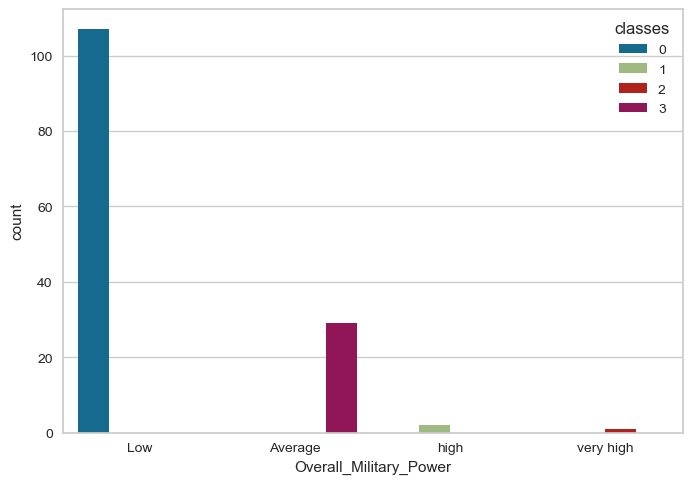

In [142]:
sns.countplot(x = 'Overall_Military_Power', hue = 'classes',data = mil_dataset)

<Axes: ylabel='classes'>

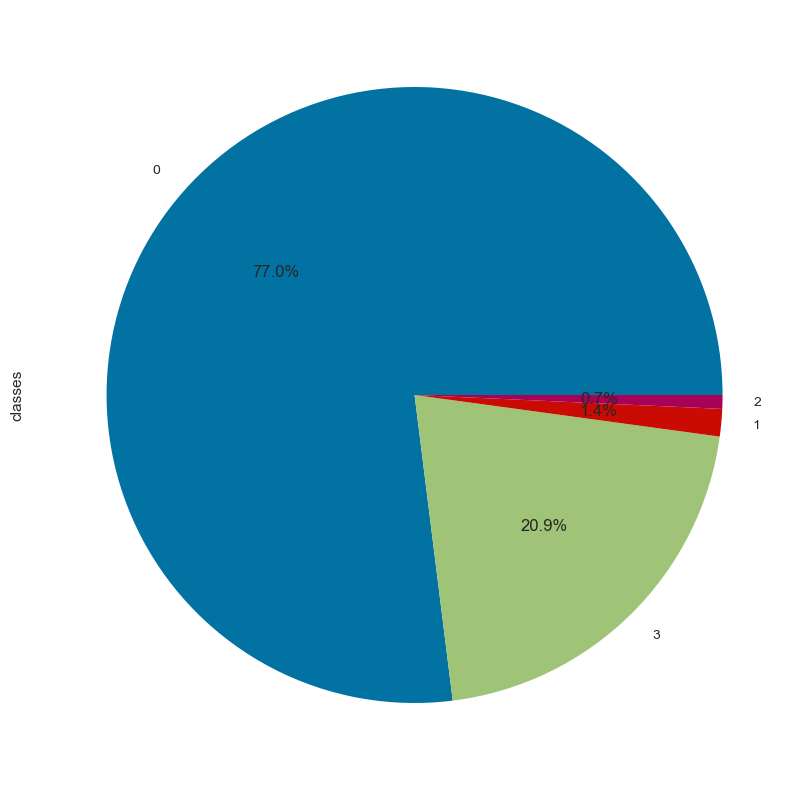

In [143]:
#piechart for unique class count
mil_dataset['classes'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',figsize=(10,10))


In [144]:
 mil_dataset['Military_Strength_Power_Index'].value_counts().index.sort_values()



Float64Index([    0.0,  0.0606,  0.0681,  0.0691,  0.0953,  0.1501,  0.1509,
               0.1702,  0.1717,  0.1872,
              ...
               3.2889,  3.3736,  3.4433,  3.6537,  3.8586,  4.2063,  4.6042,
               4.6404,  5.5737, 10.1681],
             dtype='float64', length=139)

In [145]:
mil_dataset.head()

,Country,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,...,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,classes,Overall_Military_Power
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,2.840000e+09,0.0,5500.0,14325743.0,34940837.0,652230.0,1200.0,5987.0,0,Low
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,9.505000e+09,16000.0,42500.0,1519438.0,3057220.0,28748.0,41.0,691.0,0,Low
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,6.260000e+09,1306000.0,325000.0,20741263.0,41657488.0,2381741.0,0.0,6734.0,3,Average
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,4.208000e+10,1666000.0,82300.0,6244205.0,30355880.0,1246700.0,1300.0,5369.0,0,Low
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,2.149000e+11,479400.0,685000.0,20179430.0,44694198.0,2780400.0,11000.0,11968.0,0,Low


# Insights


In [146]:
mil_dataset.groupby(['Overall_Military_Power','classes'])[['Aircraft_Strength_value','Available_Manpower_value','Total_Population_value','Military_Strength_Power_Index']].mean()

,,Aircraft_Strength_value,Available_Manpower_value,Total_Population_value,Military_Strength_Power_Index
Overall_Military_Power,classes,,,,
Average,3,776.482759,5.698832e+07,1.173498e+08,0.332866
Low,0,97.700935,8.328040e+06,1.943652e+07,1.791850
high,1,3686.500000,4.112478e+08,7.634059e+08,0.068600
very high,2,13264.000000,1.448728e+08,3.292565e+08,0.060600


From the provided data showing mean values for 'Aircraft_Strength_value', 'Available_Manpower_value', and 'Total_Population_value' across different classes of 'Overall_Military_Power,' we can draw several insights:

 **Aircraft Strength:**
   - The 'very high' overall military power class (Class 2) has the highest mean value for Aircraft Strength, indicating a concentration of countries with strong air capabilities in this class. This suggests a positive correlation between overall military power and aircraft strength.

 **Available Manpower:**
   - The 'high' overall military power class (Class 1) has the highest mean value for Available Manpower, indicating a concentration of countries with a large and potentially well-trained military workforce in this class. This suggests a positive correlation between overall military power and available manpower.

**Total Population:**
   - The 'very high' overall military power class (Class 2) has the highest mean value for Total Population, suggesting that countries with the highest military power tend to have larger overall populations. This could indicate a correlation between military power and the size of a country's population.

**Comparative Strengths:**
   - Class 2 ('very high' power) stands out in terms of both Aircraft Strength and Available Manpower, indicating a comprehensive military capability that includes strong air power and a large pool of potential recruits.

**Class Distribution:**
   - The 'Low' overall military power class (Class 0) has the lowest mean values across all three indicators. This suggests that countries in this class may face challenges in terms of aircraft strength, available manpower, and total population.

These insights provide a general understanding of the relationships between overall military power classes and specific military indicators. It's important to note that these are mean values, and individual country variations within each class should be considered. Further analysis, validation, and interpretation may involve exploring additional features, considering the geopolitical context, and understanding the unique characteristics of each class.

Additionally, the insights can inform strategic decisions related to resource allocation, military modernization, and training programs based on the identified strengths and weaknesses within each class.